<a href="https://colab.research.google.com/github/htapiagroup/sistdist/blob/master/SistDist_S3_EjercicioTiming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import dask.array as da
import h5py, time

In [2]:
!wget https://www.gw-osc.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5

--2019-05-21 18:40:31--  https://www.gw-osc.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5
Resolving www.gw-osc.org (www.gw-osc.org)... 131.215.125.179
Connecting to www.gw-osc.org (www.gw-osc.org)|131.215.125.179|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gw-openscience.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5 [following]
--2019-05-21 18:40:32--  https://www.gw-openscience.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.125.179
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.125.179|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5/ [following]
--2019-05-21 18:40:32--  https://www.gw-openscience.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5/
Reusing existing connection t

In [0]:
!cp H-H1_LOSC_4_V1-815411200-4096.hdf5 LIGO_data.hdf5

In [0]:
with h5py.File('./LIGO_data.hdf5') as dset:
  strain = dset['strain']['Strain'][:]

In [32]:
res = []

for n_chunks in 2**np.arange(10):
  chunk_size = strain.shape[0] // n_chunks
  # mide el tiempo con numpy
  
  ti = time.time()
  tmp = np.array([np.nanmean(strain_split) for strain_split in np.array_split(strain, n_chunks)])
  tf = time.time()
  df_np = (tf-ti)*1000
  # print('Tiempo transcurrido: {} ms'.format(df_np))
  
  # mide el tiempo con dask
  strain_dask8 = da.from_array(strain, chunks=chunk_size)
  
  ti = time.time()
  promedio8 = strain_dask8.mean().compute()
  tf = time.time()
  df_dask = (tf-ti)*1000
  # print('Tiempo transcurrido: {} ms'.format(df))

  res.append([n_chunks, df_np, df_dask])

res = pd.DataFrame(np.array(res), columns=["chunk", "t1", "t2"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [33]:
res

[[1, 212.25333213806152, 65.49191474914551],
 [2, 118.09039115905762, 47.661542892456055],
 [4, 123.19231033325195, 54.69489097595215],
 [8, 128.04555892944336, 48.726558685302734],
 [16, 126.30867958068848, 61.68961524963379],
 [32, 112.51354217529297, 71.2897777557373],
 [64, 117.83981323242188, 98.8626480102539],
 [128, 87.7830982208252, 153.43928337097168],
 [256, 89.53261375427246, 208.6014747619629],
 [512, 70.04690170288086, 371.4752197265625]]

In [0]:
import pandas as pd

In [0]:
res= pd.DataFrame(np.array(res), columns=["chunk", "t1", "t2"])

In [0]:
pd.DataFrame?

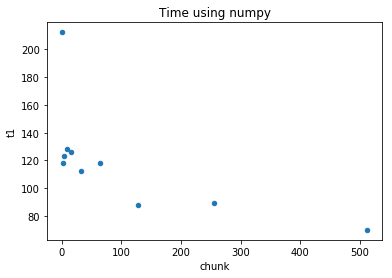

In [45]:
res.plot.scatter(x="chunk", y="t1", title="Time using numpy");

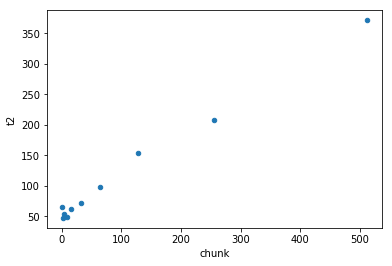

In [43]:
res.plot.scatter(x="chunk", y="t2", title="Time using dask");